In [1]:
# import libs
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import numpy as np
from pyspark.sql.functions import col
import datetime
from pyspark.sql import Row
import csv

In [2]:
# load dataset
entropy_df = spark.read.csv(
    "data/entropy-stats-top100.csv", header=True, mode="DROPMALFORMED"
)
entropy_df.show(5)

+---+------------------+------------------+
|  k|             Spark|              Self|
+---+------------------+------------------+
|  2| 4.071832950360835| 3.909885653810936|
|  3|  4.03076898640203| 3.761933378631347|
|  4|3.9307283699721998|3.6466430470090563|
|  5|3.8190879053273625| 3.538522621502247|
|  6|3.8029337015661744|3.4730491537309587|
+---+------------------+------------------+
only showing top 5 rows



In [3]:
# load dataset
purity_df = spark.read.csv(
    "data/purity-stats-top100.csv", header=True, mode="DROPMALFORMED"
)
purity_df.show(5)

+---+--------------------+-------------------+
|  k|               Spark|               Self|
+---+--------------------+-------------------+
|  2|   0.050252076385573|0.05073130763727764|
|  3|0.060439938828797175|0.06500160739902049|
|  4|  0.0732741604286933|0.08434590874006519|
|  5| 0.08951435243827001|0.09478590185808455|
|  6| 0.09409618058975257|0.11262572913377644|
+---+--------------------+-------------------+
only showing top 5 rows



In [5]:
pearson_df = spark.read.csv(
    "data/mykmeans-pearson-top100.csv", header=True, mode="DROPMALFORMED"
)
pearson_df.show(5)

+---+------------------+------------------+-------------------+
|  k|              Cost|           Entropy|             Purity|
+---+------------------+------------------+-------------------+
|  2|32245.661974708484| 3.903965833880489|0.04728788993423664|
|  3|30755.910572598954| 3.754995169367837|0.06462564062937842|
|  4|29504.674719395563| 3.635405949684358|0.08314814196552214|
|  5|28306.591448482206|3.5344844174595114|0.09978389332122171|
|  6|   27659.540816127| 3.463105549572516|0.11166627015661391|
+---+------------------+------------------+-------------------+
only showing top 5 rows



In [6]:
cols = entropy_df.columns[1:]
entropy_df = entropy_df.select(col('k').cast('int'), *(col(c).cast("float").alias(c) for c in cols))
purity_df = purity_df.select(col('k').cast('int'), *(col(c).cast("float").alias(c) for c in cols))
pearson_df = pearson_df.select(col('k').cast('int'), *(col(c).cast('float').alias(c) for c in pearson_df.columns[1:]))

In [7]:
k               = entropy_df.select('k').rdd.map(lambda x: x[0]).collect()
entropy_cosine    = entropy_df.select('Self').rdd.map(lambda x: x[0]).collect()
purity_cosine     = purity_df.select('Self').rdd.map(lambda x: x[0]).collect()
entropy_pearson    = pearson_df.select('Entropy').rdd.map(lambda x: x[0]).collect()
purity_pearson     = pearson_df.select('Purity').rdd.map(lambda x: x[0]).collect()

In [8]:
new_entropy_cosine = [x*0.4 for x in entropy_cosine]
new_entropy_pearson = [x*0.4 for x in entropy_pearson]

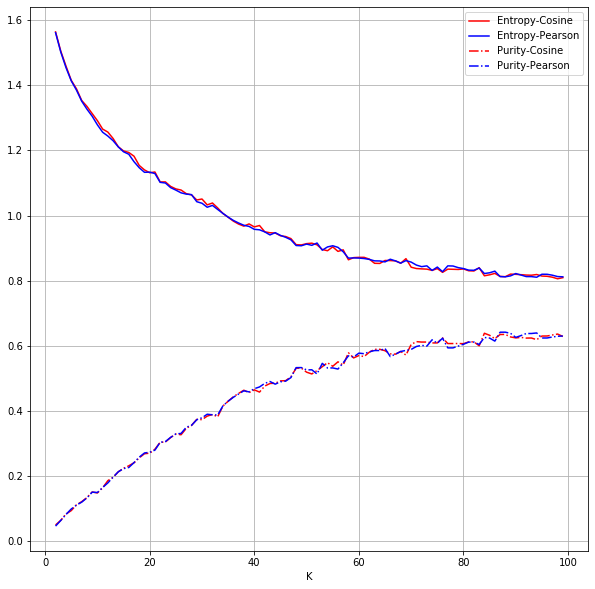

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.grid(True)

plt.plot(k, new_entropy_cosine, 'r', k, new_entropy_pearson, 'b')
plt.plot(k, purity_cosine, '-.r', k, purity_pearson, '-.b')

plt.legend(['Entropy-Cosine', 'Entropy-Pearson', 'Purity-Cosine', 'Purity-Pearson'])
plt.xlabel('K')

# plt.title('Cost comparsion')

plt.savefig('experiment-2.png')